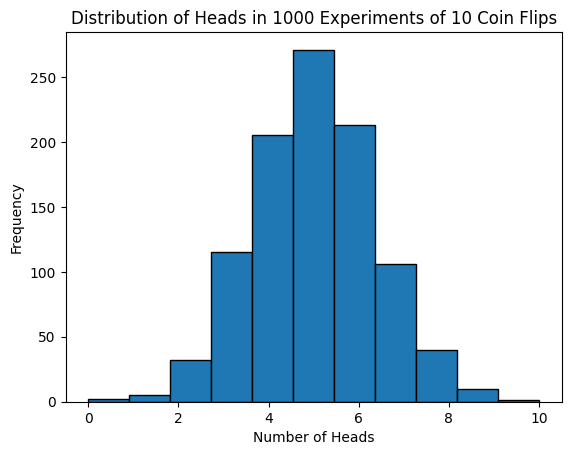

np.float64(0.271)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate 1000 experiments of 10 coin flips
n_experiments = 1000
n_flips = 10

results = np.random.binomial(n=1, p=0.5, size=(n_experiments, n_flips))
heads_count = results.sum(axis=1)

# Plot distribution
plt.hist(heads_count, bins=11, edgecolor='black')
plt.xlabel("Number of Heads")
plt.ylabel("Frequency")
plt.title("Distribution of Heads in 1000 Experiments of 10 Coin Flips")
plt.show()

# Empirical probability of exactly 5 heads
empirical_prob_5 = np.mean(heads_count == 5)
empirical_prob_5


In [ ]:
import seaborn as sns
df = sns.load_dataset("titanic")
df.head()

p_survived_given_female = df[df['sex']=='female']['survived'].mean()
p_survived_given_female

p_female_given_survived = df[df['survived']==1]['sex'].value_counts(normalize=True)['female']
p_female_given_survived

np.float64(0.6812865497076024)

In [ ]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("titanic").dropna(subset=['age','sex','class','survived'])

X = df[['sex','class','age']]
y = df['survived']

X_encoded = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

accuracy, cm

(0.7534883720930232,
 array([[103,  23],
        [ 30,  59]]))

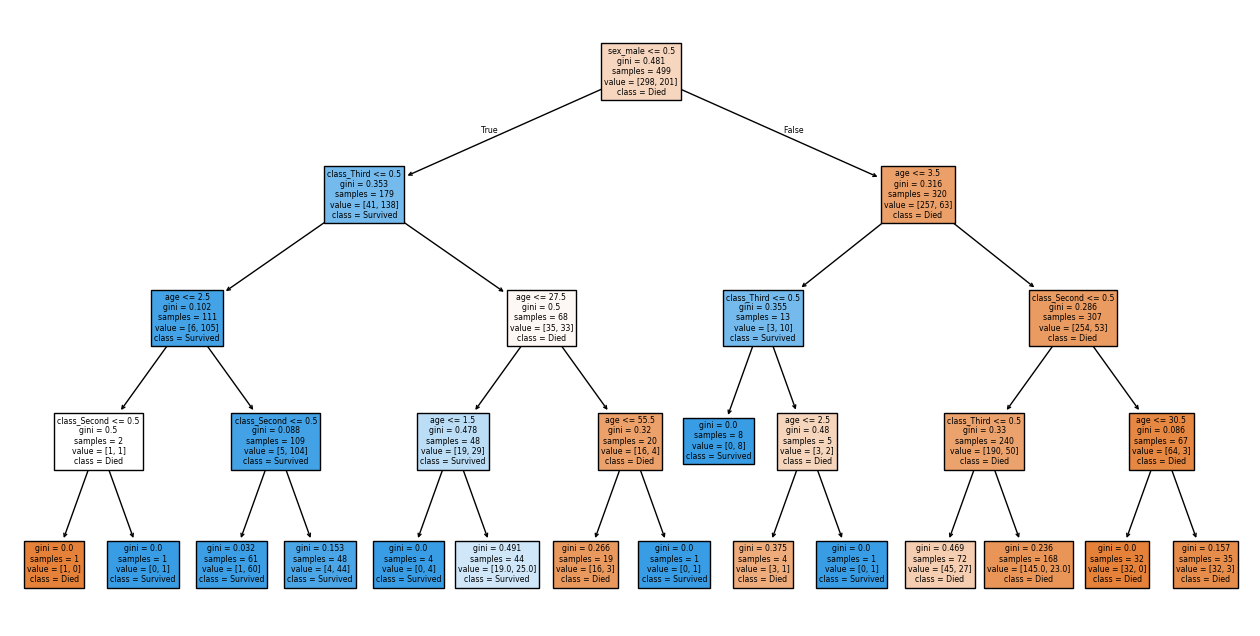

2 0.786046511627907
4 0.7674418604651163
6 0.7581395348837209
None 0.7767441860465116


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

plt.figure(figsize=(16,8))
plot_tree(tree, feature_names=X_encoded.columns, class_names=['Died','Survived'], filled=True)
plt.show()

y_pred_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree)

accuracy_tree, cm_tree

importances = pd.Series(tree.feature_importances_, index=X_encoded.columns)
importances.sort_values(ascending=False)

for depth in [2, 4, 6, None]:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    print(depth, accuracy_score(y_test, tree.predict(X_test)))
